# Preprocessing

## Prediction Target
- burned area

## Transforms
- day to numerical
- month to numerical
- area reduce skew range

In [48]:
import math
import numpy as np
import pandas as pd

In [49]:
ff = pd.read_csv("forestfires.csv")

In [50]:
minmax_ff = ff.copy()
zscore_ff = ff.copy()

In [51]:
# Mapping month and day to time order
month_map:dict = {
    "jan":0, "feb":1, "mar":2, "apr":3, "may":4, "jun":5, "jul":6, "aug":7, "sep":8, "oct":9, "nov":10, "dec":11
}
day_map:dict = {
    "mon":0, "tue":1, "wed":2, "thu":3, "fri":4, "sat":5, "sun":6
}

In [52]:
# Converting day and month values to numerical version
zscore_ff["day"] = zscore_ff["day"].map(day_map)
zscore_ff["month"] = zscore_ff["month"].map(month_map)
minmax_ff["day"] = minmax_ff["day"].map(day_map)
minmax_ff["month"] = minmax_ff["month"].map(month_map)

In [53]:
# Feature scaling on area to reduce the distribution range
scale = lambda x:math.log(x+1)
zscore_ff["area"] = zscore_ff["area"].apply(scale)
minmax_ff["area"] = minmax_ff["area"].apply(scale)

In [54]:
import matplotlib.pyplot as plt
import math

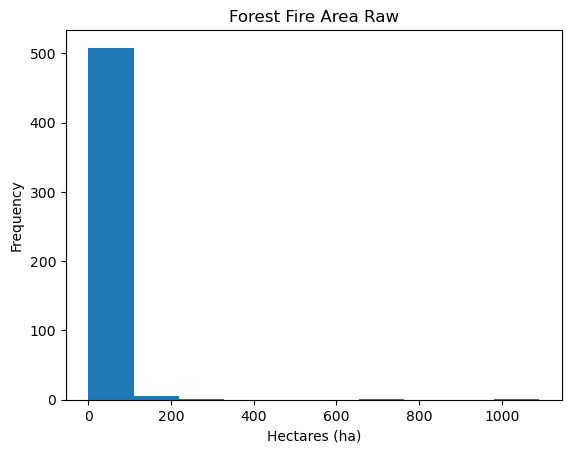

In [55]:
# Original area feature distribution
plt.hist(x=ff["area"])
plt.title("Forest Fire Area Raw")
plt.xlabel("Hectares (ha)")
plt.ylabel("Frequency")
plt.show()

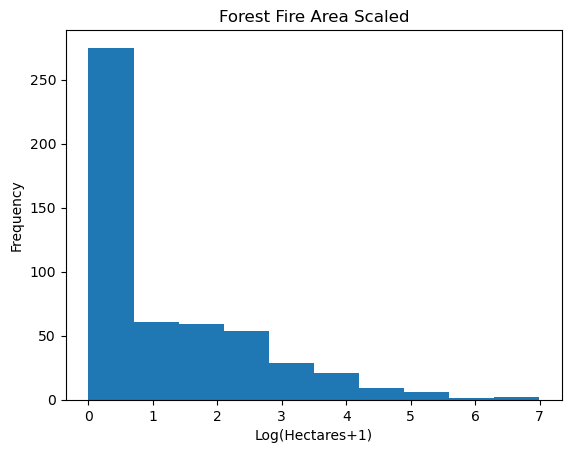

In [56]:
# Feature scaled forest fire area distribution
scale = lambda x:math.log(x+1)
plt.hist(x=ff["area"].apply(scale))
plt.title("Forest Fire Area Scaled")
plt.xlabel("Log(Hectares+1)")
plt.ylabel("Frequency")
plt.show()

## Normalizations
Questions: 
- What ML models are you using?
    > - SVM
    > - Neural Network
- Does the data need to be normalized for those models to be effective?
    > Yes
    > - SVM regressors require a distance margin from the hyperplane that is trying to minimize the epsilon value.
    > - Neural networks can still find trends in the data by adjusting weights accordingly but varying distances can decrease the efficiency of the learning rate.
- What normalization technique should be used?
    > - In this case, there are no unlabelled data points outside the range that we are expecting to have to predict for. Hence we use min-max normalization.
    > - In the case that there were new instances that require prediction, z-score normalization would be more appropriate.

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [58]:
# Z-Score normalization on all attributes excluding target variable.
# Target variable will be converted back to hectares for interpretability in modelling stage.
zscore = StandardScaler()

for attr in zscore_ff.drop(columns="area"):
    zscore_ff[attr] = pd.DataFrame(
        zscore.fit_transform(zscore_ff[[attr]])
    )

In [59]:
# Min-Max normalization on all attributes excluding target variable.
# Target variable will be converted back to hectares for interpretability in modelling stage.
minmax = MinMaxScaler()

for attr in minmax_ff.drop(columns="area"):
    minmax_ff[attr] = pd.DataFrame(
        minmax.fit_transform(minmax_ff[[attr]])
    )

In [60]:
# Export for model training
zscore_ff.to_csv("zscore_ff.csv", index=False)
minmax_ff.to_csv("minmax_ff.csv", index=False)

## Feature Reduction
Check correlation matrix of features to target variable.
It doesn't appear as though any feature other than month is particularly indicative of fire spread area. Thus, no features will be removed for model training.

In [61]:
zscore_ff.corr(method="pearson")["area"]

X        0.061995
Y        0.038838
month    0.114280
day      0.000208
FFMC     0.046799
DMC      0.067153
DC       0.066360
ISI     -0.010347
temp     0.053487
RH      -0.053662
wind     0.066973
rain     0.023311
area     1.000000
Name: area, dtype: float64

In [62]:
minmax_ff.corr(method="pearson")["area"]

X        0.061995
Y        0.038838
month    0.114280
day      0.000208
FFMC     0.046799
DMC      0.067153
DC       0.066360
ISI     -0.010347
temp     0.053487
RH      -0.053662
wind     0.066973
rain     0.023311
area     1.000000
Name: area, dtype: float64

In [63]:
minmax_ff.corr(method="spearman")["area"]

X        0.060499
Y        0.046018
month    0.117681
day     -0.016799
FFMC     0.025300
DMC      0.071920
DC       0.061633
ISI      0.012496
temp     0.078696
RH      -0.024221
wind     0.053196
rain    -0.064073
area     1.000000
Name: area, dtype: float64

In [64]:
minmax_ff.corr(method="spearman")["area"]

X        0.060499
Y        0.046018
month    0.117681
day     -0.016799
FFMC     0.025300
DMC      0.071920
DC       0.061633
ISI      0.012496
temp     0.078696
RH      -0.024221
wind     0.053196
rain    -0.064073
area     1.000000
Name: area, dtype: float64